## ガウシアンフィルタ
ガウシアンフィルタ(3x3、標準偏差1.3)を実装し、imori_noise.jpgのノイズを除去せよ。

In [1]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

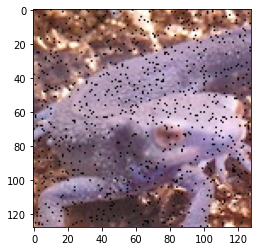

In [2]:
img = cv2.imread('../imori_noise.jpg')
plt.imshow(img)

In [7]:
a = np.array([[1,2,3,4,5,6,7,8,9],[9,8,7,6,5,4,3,2,1]])
a[:,1:-1]

array([[2, 3, 4, 5, 6, 7, 8],
       [8, 7, 6, 5, 4, 3, 2]])

In [ ]:
#パディング部分をどう実装していいかわからいない
def gaussian_filter(img, K_size=3, sigma=1.3):
       
    img_ = img.copy()
    H, W, C = img_.shape
    
    # パディング部分を増やした配列の中心にoutを入れる
    padding = np.zeros(H+2, W+2, C)
    padding[1:-1, 1:-1, :] = img_
    
    

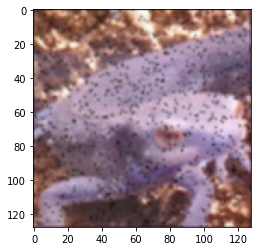

In [11]:
# 解答例
def gaussian_filter(img, K_size=3, sigma=1.3):
    if len(img.shape)==3:  # Cが存在していたら
        H,W,C = img.shape
    else:
        img = np.expad_dims(img, axis=-1)  # 次元を最後に一つ追加
        H,W,C = img.shape
        
    # zero padding
    pad = K_size//2  # =1
    out = np.zeros((H+pad*2, W+pad*2, C), dtype=np.float)
    out[pad:pad+H, pad:pad+W] = img.copy().astype(np.float)
    # ここまでは自分で考えられた
    
    
    # 個々からは、カーネルの意味がわからずできなかった
    # prepare Kernel
    K = np.zeros((K_size, K_size), dtype=np.float)
    for x in range(-pad, -pad+K_size):
        for y in range(-pad, -pad+K_size):
            K[y+pad, x+pad] = np.exp(-(x**2+y**2)/2*(sigma**2))
    K/=(2*np.pi*sigma)
    K/=K.sum()  # 何でこれやるの？→レートの総和が１になるようにしている
    
    tmp = out.copy()
    
    # filtering
    for y in range(H):
        for x in range(W):
            for c in range(C):
                out[pad+y, pad+x, c] = np.sum(K*tmp[y:y+K_size, x:x+K_size, c])
                
    out = np.clip(out, 0, 255)  # 配列の値を任意の最小値・最大値に収める
    out = out[pad:pad+H, pad:pad+W].astype(np.uint8)  # paddingで使った部分を切りすてる
    
    return out

img = cv2.imread('../imori_noise.jpg')
out = gaussian_filter(img, K_size=3, sigma=1.3)

cv2.imwrite('out9.jpg', out)
plt.imshow(out)

    